In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [63]:
R_planet = 70000
R_star = 695842
i = np.pi/2
P = 1
a = 778000000

In [64]:
delta = (R_planet/R_star)**2
transit_t = (P/np.pi)*np.arcsin((((R_star + R_planet)**2 - (a*np.cos(i))**2)**0.5)/(a*np.sin(i)))
transit_f = (P/np.pi)*np.arcsin((((R_star - R_planet)**2 - (a*np.cos(i))**2)**0.5)/(a*np.sin(i)))

In [190]:
def linear(a,b,c,d,t):
    y = b + ((d-b)/(c-a)*(t-a))
    return y

In [191]:
t=[]
t = np.arange(0.49*P,0.51*P,(transit_t - transit_f)/20)
y =[]

for i in range (0,len(t),1):
    if (t[i] <= 0.5*P or t[i] > (0.5*P + transit_t)) :
        y.append(1)
    elif (t[i]>0.5*P and t[i] <= (0.5*P + (transit_t - transit_f)/2)):
            y.append(linear(0.5*P,1,0.5*P+(transit_t - transit_f)/2,1-delta,t[i]))
    elif  (t[i]>(0.5*P + (transit_t + transit_f)/2) and t[i] <=(0.5*P + transit_t)):
            y.append(linear(0.5*P+(transit_t + transit_f)/2,1-delta,0.5*P+transit_t,1,t[i]))
    else :
            y.append(1 - delta)                 

        

Text(0, 0.5, 'relative_intensity')

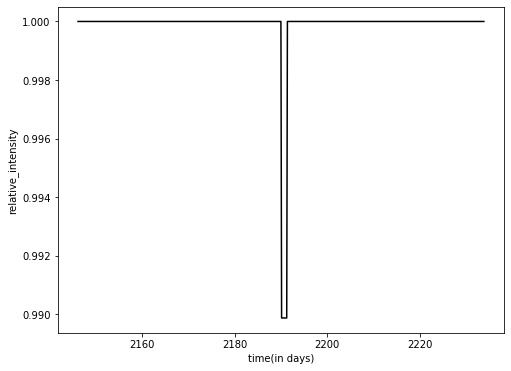

In [195]:
plt.figure(figsize=(8,6))
plt.plot(t*12*365,y,'k')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')